# 🧼 Sales Data Cleaning & Analysis
This project involves cleaning messy sales data using Pandas.  
The steps include:
- Fixing column names
- Handling missing values
- Converting data types
- Calculating total sales
- Simple product-wise analysis

## Step 1: 📥 Import Libraries & Load Data

We begin by importing the required libraries and loading the CSV file into a Pandas DataFrame.

In [34]:
import pandas as pd

df = pd.read_csv("messy_sales_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,City
0,101.0,USB-C Cable,2.0,10.99,Lahore
1,102.0,NaN,1.0,5.49,Karachi
2,103.0,Mouse,NaN,15.99,lahore
3,NaN,Keyboard,1.0,NaN,ISLAMABAD
4,105.0,Monitor,2.0,129.99,karachi


## Step 2: 🔍 Initial Data Exploration

Let’s take a look at the data shape, types, nulls, and basic statistics.

In [35]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          14 non-null     float64
 1   Product           12 non-null     object 
 2   Quantity Ordered  12 non-null     float64
 3    Price Each       14 non-null     float64
 4    City             15 non-null     object 
dtypes: float64(3), object(2)
memory usage: 732.0+ bytes


Order ID            1
Product             3
Quantity Ordered    3
 Price Each         1
 City               0
dtype: int64

## Step 3: 🧽 Clean Column Names

We will standardize column names by removing spaces, making lowercase, and replacing spaces with underscores.

In [37]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,order_id,product,quantity_ordered,price_each,city
0,101.0,USB-C Cable,2.0,10.99,Lahore
1,102.0,NaN,1.0,5.49,Karachi
2,103.0,Mouse,NaN,15.99,lahore
3,NaN,Keyboard,1.0,NaN,ISLAMABAD
4,105.0,Monitor,2.0,129.99,karachi


## Step 4: ✂️ Clean Text Columns

Trimming white spaces from product and city names to ensure consistency.

In [8]:
df['product'] = df['product'].str.strip()
df['city'] = df['city'].str.strip().str.title()
df.head()

,order_id,product,quantity_ordered,price_each,city
0,101.0,USB-C Cable,2.0,10.99,Lahore
1,102.0,NaN,1.0,5.49,Karachi
2,103.0,Mouse,NaN,15.99,Lahore
3,NaN,Keyboard,1.0,NaN,Islamabad
4,105.0,Monitor,2.0,129.99,Karachi


## Step 5: 🔁 Convert Data Types

Convert `quantity_ordered` and `price_each` columns from string to numeric types to allow calculations.

In [10]:
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'], errors='coerce')
df['price_each'] = pd.to_numeric(df['price_each'], errors='coerce')

## Step 6: 🚫 Handle Missing Values

Remove rows that contain missing or invalid values in key columns.

In [11]:
df = df.dropna()
df.shape

(9, 5)

## Step 7: 💰 Create Total Price Column

Add a new column `total_price` by multiplying quantity and price.
This helps in analyzing total revenue per transaction.

In [12]:
df['total_price'] = df['quantity_ordered'] * df['price_each']
df.head()

,order_id,product,quantity_ordered,price_each,city,total_price
0,101.0,USB-C Cable,2.0,10.99,Lahore,21.98
4,105.0,Monitor,2.0,129.99,Karachi,259.98
5,106.0,Webcam,1.0,45.00,Lahore,45.00
6,107.0,Mouse,2.0,15.99,Karachi,31.98
7,108.0,USB-C Cable,3.0,10.99,Lahore,32.97


## Step 8: 📊 Visualize Sales by Product

Let’s use a bar chart to visualize total sales per product.

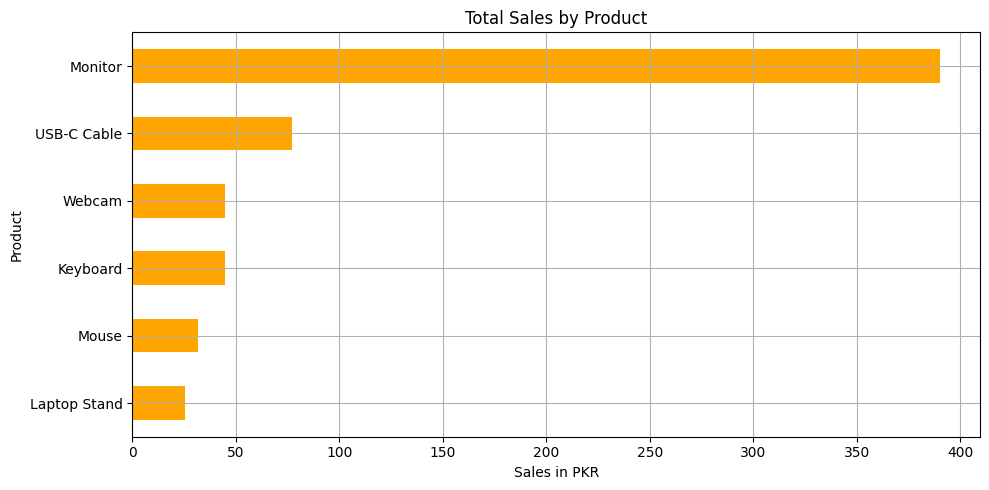

In [30]:
import matplotlib.pyplot as plt

# Product-wise sales chart
df.groupby('product')['total_price'].sum().sort_values().plot(kind='barh', figsize=(10,5), color='orange')
plt.title("Total Sales by Product")
plt.xlabel("Sales in PKR")
plt.ylabel("Product")
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 9: 🏙️ Visualize Sales by City

Another chart to compare city-wise sales.

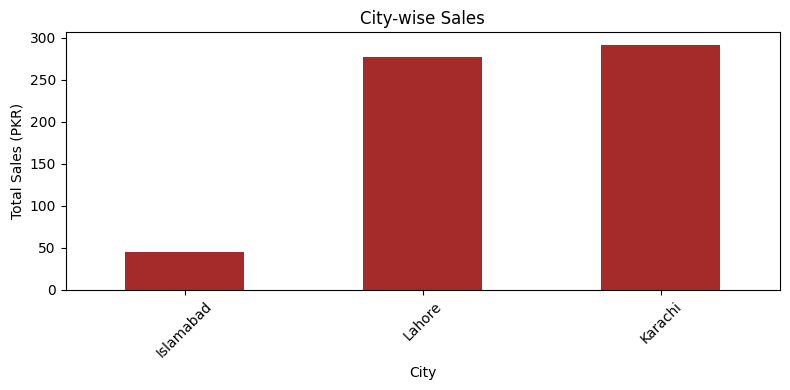

In [32]:
df.groupby('city')['total_price'].sum().sort_values().plot(kind='bar', figsize=(8,4), color='brown')
plt.title("City-wise Sales")
plt.xlabel("City")
plt.ylabel("Total Sales (PKR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 10: 💾 Save Cleaned Dataset

Finally, export the cleaned DataFrame to a new CSV file for future use.


In [14]:
df.to_csv("cleaned_sales_data.csv", index=False)

## 🧾 Summary

In this project, we:
- Cleaned a messy dataset
- Removed missing values
- Created a new `total_price` column
- Visualized key insights
- Exported the cleaned dataset

➡️ This project showcases real-world data wrangling skills using Pandas.